In [2]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler   
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN

In [3]:
df=pd.read_csv('matches.csv')

In [4]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [6]:
df.info


<bound method DataFrame.info of            id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

       

In [7]:
round(df.describe(),2)

,id,result_margin,target_runs,target_overs
count,1095.00,1076.00,1092.00,1092.00
mean,904828.32,17.26,165.68,19.76
std,367740.24,21.79,33.43,1.58
min,335982.00,1.00,43.00,5.00
25%,548331.50,6.00,146.00,20.00
50%,980961.00,8.00,166.00,20.00
75%,1254062.50,20.00,187.00,20.00
max,1426312.00,146.00,288.00,20.00


In [9]:
df.dtypes


id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              object
umpire1             object
umpire2             object
dtype: object

In [10]:
df['city'].unique

<bound method Series.unique of 0        Bangalore
1       Chandigarh
2            Delhi
3           Mumbai
4          Kolkata
           ...    
1090     Hyderabad
1091     Ahmedabad
1092     Ahmedabad
1093       Chennai
1094       Chennai
Name: city, Length: 1095, dtype: object>

In [12]:
df['player_of_match'].unique

<bound method Series.unique of 0           BB McCullum
1            MEK Hussey
2           MF Maharoof
3            MV Boucher
4             DJ Hussey
             ...       
1090    Abhishek Sharma
1091           MA Starc
1092           R Ashwin
1093      Shahbaz Ahmed
1094           MA Starc
Name: player_of_match, Length: 1095, dtype: object>

In [13]:
df['winner'].unique

<bound method Series.unique of 0             Kolkata Knight Riders
1               Chennai Super Kings
2                  Delhi Daredevils
3       Royal Challengers Bangalore
4             Kolkata Knight Riders
                   ...             
1090            Sunrisers Hyderabad
1091          Kolkata Knight Riders
1092               Rajasthan Royals
1093            Sunrisers Hyderabad
1094          Kolkata Knight Riders
Name: winner, Length: 1095, dtype: object>

In [18]:
df['result_margin'].value_counts

<bound method IndexOpsMixin.value_counts of 0       140.0
1        33.0
2         9.0
3         5.0
4         5.0
        ...  
1090      4.0
1091      8.0
1092      4.0
1093     36.0
1094      8.0
Name: result_margin, Length: 1095, dtype: float64>

In [19]:
df['method']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1090    NaN
1091    NaN
1092    NaN
1093    NaN
1094    NaN
Name: method, Length: 1095, dtype: object

In [20]:
df['method'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1090    NaN
1091    NaN
1092    NaN
1093    NaN
1094    NaN
Name: method, Length: 1095, dtype: object>

In [23]:
df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [24]:
cat=[]
num=[]

In [32]:
cat=[col for col in df.columns if df[col].dtype=='object']
num=[col for col in df.columns if df[col].dtype=='float64']

In [34]:
cat

['season',
 'city',
 'date',
 'match_type',
 'player_of_match',
 'venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'result',
 'super_over',
 'method',
 'umpire1',
 'umpire2']

In [35]:
num

['result_margin', 'target_runs', 'target_overs']

In [36]:
for i in df:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [38]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
# df['match_type'].replace(["","",""],value=[0,1,2],inplace=True)

In [39]:
df["match_type"].unique()

array(['League', 'Semi Final', 'Final', '3rd Place Play-Off',
       'Qualifier 1', 'Elimination Final', 'Qualifier 2', 'Eliminator'],
      dtype=object)

In [41]:
df['toss_decision'].replace(["bat","field"],value=[1,0],inplace=True)

In [64]:
df['toss_decision']=df['toss_decision'].astype('float')

In [70]:
df["toss_decision"].astype("float")

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1090    1.0
1091    1.0
1092    0.0
1093    0.0
1094    1.0
Name: toss_decision, Length: 1095, dtype: float64

In [44]:
df["result"].unique()

array(['runs', 'wickets', 'tie', 'no result'], dtype=object)

In [47]:
df["result"].replace(["no result"],["tie"],inplace=True)

In [49]:
df["super_over"].unique()

array(['N', 'Y'], dtype=object)

In [51]:
df["super_over"].replace(["Y","N"],value=[1,0],inplace=True)

In [63]:
df["super_over"]=df["super_over"].astype('float')

<Axes: >

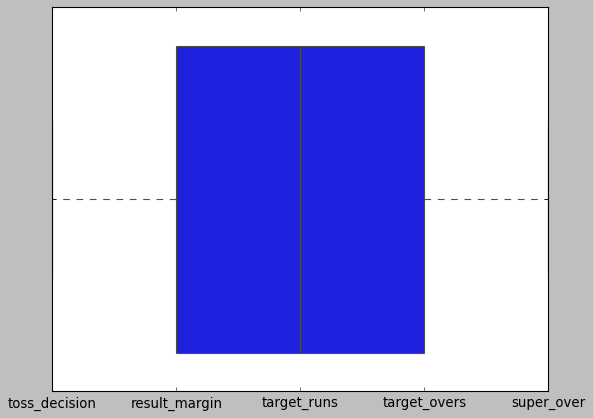

In [81]:
sns.boxplot(num,orient='h')

In [62]:
df.dtypes()

TypeError: 'Series' object is not callable

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   float64
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   float64
 17  method        

In [75]:
num=[col for col in df.columns if df[col].dtypes=="float64"]

In [68]:
ndf=pd.DataFrame(num)

In [78]:
df["toss_decision"].dtypes

dtype('float64')

In [86]:
df.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
796,1216521,2020/21,Mumbai,2020-10-23,League,TA Boult,Sharjah Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,0.0,Mumbai Indians,wickets,10.0,115.0,20.0,0.0,D/L,C Shamshuddin,VA Kulkarni
835,1254077,2021,Chennai,2021-04-25,League,PP Shaw,"MA Chidambaram Stadium, Chepauk, Chennai",Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,1.0,Delhi Capitals,tie,6.0,160.0,20.0,1.0,D/L,CB Gaffaney,KN Ananthapadmanabhan
477,829745,2015,Bangalore,2015-04-22,League,SK Raina,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,0.0,Chennai Super Kings,runs,27.0,182.0,20.0,0.0,D/L,JD Cloete,C Shamshuddin
923,1304094,2022,Navi Mumbai,2022-05-03,League,K Rabada,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,Punjab Kings,Gujarat Titans,1.0,Punjab Kings,wickets,8.0,144.0,20.0,0.0,D/L,R Pandit,VK Sharma
700,1175360,2019,Delhi,2019-03-26,League,SR Watson,Arun Jaitley Stadium,Delhi Capitals,Chennai Super Kings,Delhi Capitals,1.0,Chennai Super Kings,wickets,6.0,148.0,20.0,0.0,D/L,M Erasmus,Nitin Menon


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   float64
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   float64
 17  method        

In [82]:
sns.heatmap(ndf.corr(),annot=True,mask=np.triu(ndf.corr(),+1))

ValueError: could not convert string to float: 'toss_decision'

In [85]:
ndf.isnull()

,0
0,False
1,False
2,False
3,False
4,False


In [80]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,Kolkata Knight Riders,runs,140.0,223.0,20.0,0.0,D/L,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,1.0,Chennai Super Kings,runs,33.0,241.0,20.0,0.0,D/L,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,1.0,Delhi Daredevils,wickets,9.0,130.0,20.0,0.0,D/L,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,1.0,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,0.0,D/L,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,1.0,Kolkata Knight Riders,wickets,5.0,111.0,20.0,0.0,D/L,BF Bowden,K Hariharan
